# 🎯 BANK_TERM_DEPOSIT_SUBSCRIPTION_PREDICTION (CLASSIFICATION) :

## 🔍 Classification Problem Farming :

### 1️⃣.Why it research matters?
   * Helps the bank focus on high-potential clients, reducing marketing costs.
   * Improves efficiency of campaign calls.
   * Increases customer satisfaction by targeting relevant offers.
### 2️⃣. Target Variable (Label)
   * Column: y
   * Type: Binary Classification
         * yes → Client subscribed to a term deposit
         * no → Client did not subscribe
### 3️⃣.Features (Predictors)
  * From dataset:
        * Demographics: age, job, marital, education
        * Credit/Financial Status: default, balance, housing, loan
        * Campaign-related info: contact, day, month, duration, campaign, pdays, previous, poutcome
### 4️⃣.Constraints
 * Time: Predictions should be generated quickly so they can be used in live campaigns.
 * Interpretability: Business stakeholders may prefer models they can explain (e.g., Logistic Regression or tree-based models with feature importance).
 * Accuracy: Must maintain high recall (catch as many potential subscribers as possible) without sacrificing too much precision.
 * Cost: Calls to uninterested clients waste resources — false positives are costly.

## 🛠 Importing the Libraries :

In [5]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install catboost


Note: you may need to restart the kernel to use updated packages.


In [7]:
#IMPORTING THR LIBRARIES
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import joblib
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTENC
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    roc_auc_score
)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## ⏳ Data Loading and Understanding :
   * Explore dataset size, structure, and column types.
   * EDA (Exploratory Data Analysis):
      * missing values check
      * Feature distribution
      * Outlier detection
      * Target variable balance
   * Domain insight: Understand the meaning of each feature.


In [9]:
# Load datase
df=pd.read_csv("bank_deposit.csv")

In [10]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [11]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

## 📢 UNDERSTANDING THE DATA-FEATURES :
* Context Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing, and digital marketing.
* Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
* The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe to a term deposit (variable y).
* Content The data is related to the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed by the customer or not. The data folder contains two datasets:-
* train.csv: 45,211 rows and 18 columns ordered by date (from May 2008 to November 2010) test.csv: 4521 rows and 18 columns with 10% of the examples (4521), randomly selected from train.csv Detailed Column Descriptions bank client data:
* 1 - age (numeric)
* 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services")
* 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
* 4 - education (categorical: "unknown","secondary","primary","tertiary")
* 5 - default: has credit in default? (binary: "yes","no")
* 6 - balance: average yearly balance, in euros (numeric)
* 7 - housing: has housing loan? (binary: "yes","no")
* 8 - loan: has personal loan? (binary: "yes","no") related with the last contact of the current campaign:
* 9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
* 10 - day: last contact day of the month (numeric)
* 11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
* 12 - duration: last contact duration, in seconds (numeric) other attributes:
* 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
* 15 - previous: number of contacts performed before this campaign and for this client (numeric)
* 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success") Output variable (desired target):
* 17 - y - has the client subscribed a term deposit? (binary: "yes","no")
* The purpose behind this dataset is to train a predictive model that can determine if a given customer will subscribe to a term deposit based on these    various features. By analyzing historical data on successful and unsuccessful subscription outcomes, patterns can be identified which help predict      future subscription behavior.
*In addition to training data, there is also test data included in this dataset. This test data can be used to evaluate how well our trained      predictive model performs when applied to new, unseen instances.
* By utilizing this dataset and applying machine learning techniques, businesses in similar domains can better understand their target audience and optimize their marketing efforts towards potential subscribers who are more likely to respond positively to these campaigns.
### 📚 Source: https://huggingface.co/datasets/Andyrasika/banking-marketing

In [13]:
# Dataset size, structure, and column types
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)

Shape of dataset: (4521, 17)

Data types:
 age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [14]:
# Checking the number of unique values
df.select_dtypes(include='int64').nunique()

age           67
balance     2353
day           31
duration     875
campaign      32
pdays        292
previous      24
dtype: int64

In [15]:
# Checking the number of unique values
df.select_dtypes(include='object').nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
y             2
dtype: int64

In [16]:
#  Missing values check
print("\nMissing values per column:\n", df.isnull().sum())


Missing values per column:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [17]:
#  Basic statistics for numerical features
print("\nStatistical summary (numerical):\n", df.describe())



Statistical summary (numerical):
                age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.00000

In [18]:
#  Statistical summary for categorical features
print("\nStatistical summary (categorical):\n", df.describe(include=["object"]))


Statistical summary (categorical):
                job  marital  education default housing  loan   contact month  \
count         4521     4521       4521    4521    4521  4521      4521  4521   
unique          12        3          4       2       2     2         3    12   
top     management  married  secondary      no     yes    no  cellular   may   
freq           969     2797       2306    4445    2559  3830      2896  1398   

       poutcome     y  
count      4521  4521  
unique        4     2  
top     unknown    no  
freq       3705  4000  


In [19]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [20]:
df.duplicated().sum()

0

## 📊  Data Visualization :

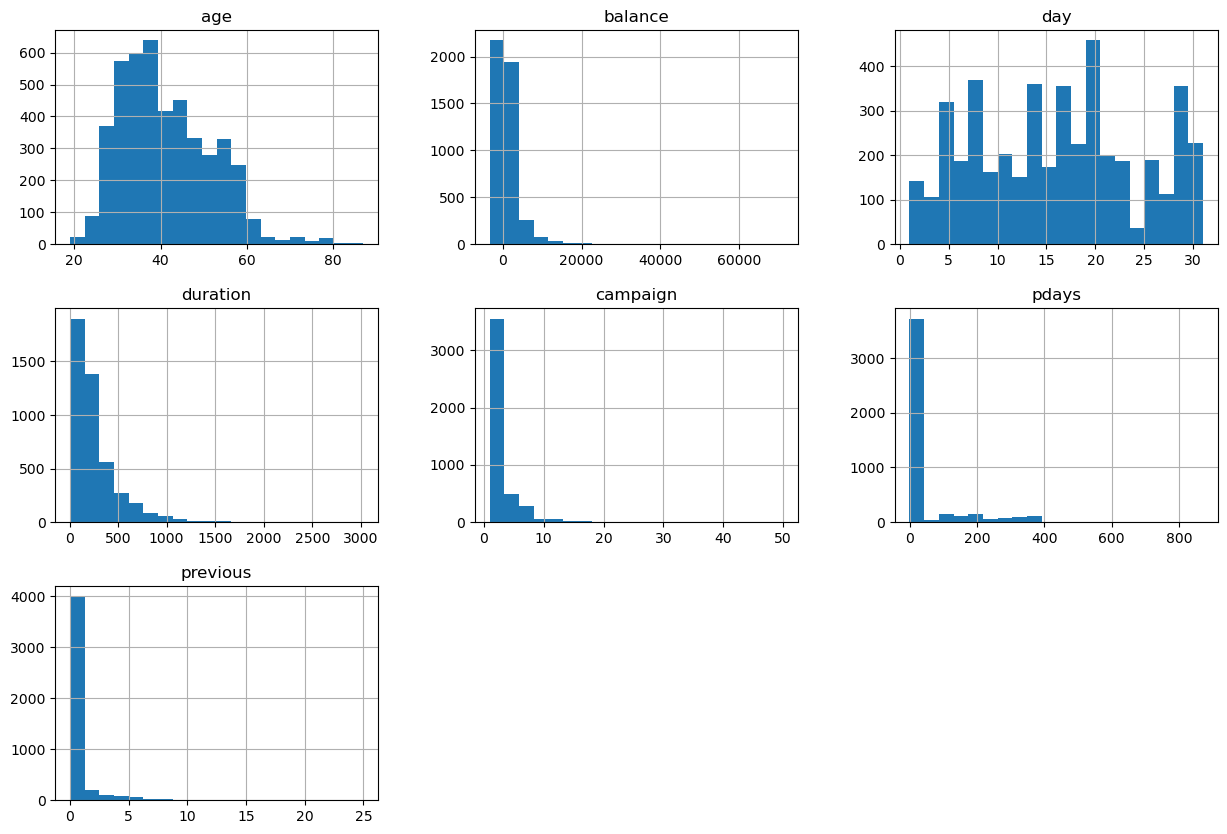

In [22]:
numeric_columns = df.select_dtypes(include=['int64'])
numeric_columns.hist(bins=20, figsize=(15, 10))
plt.show()

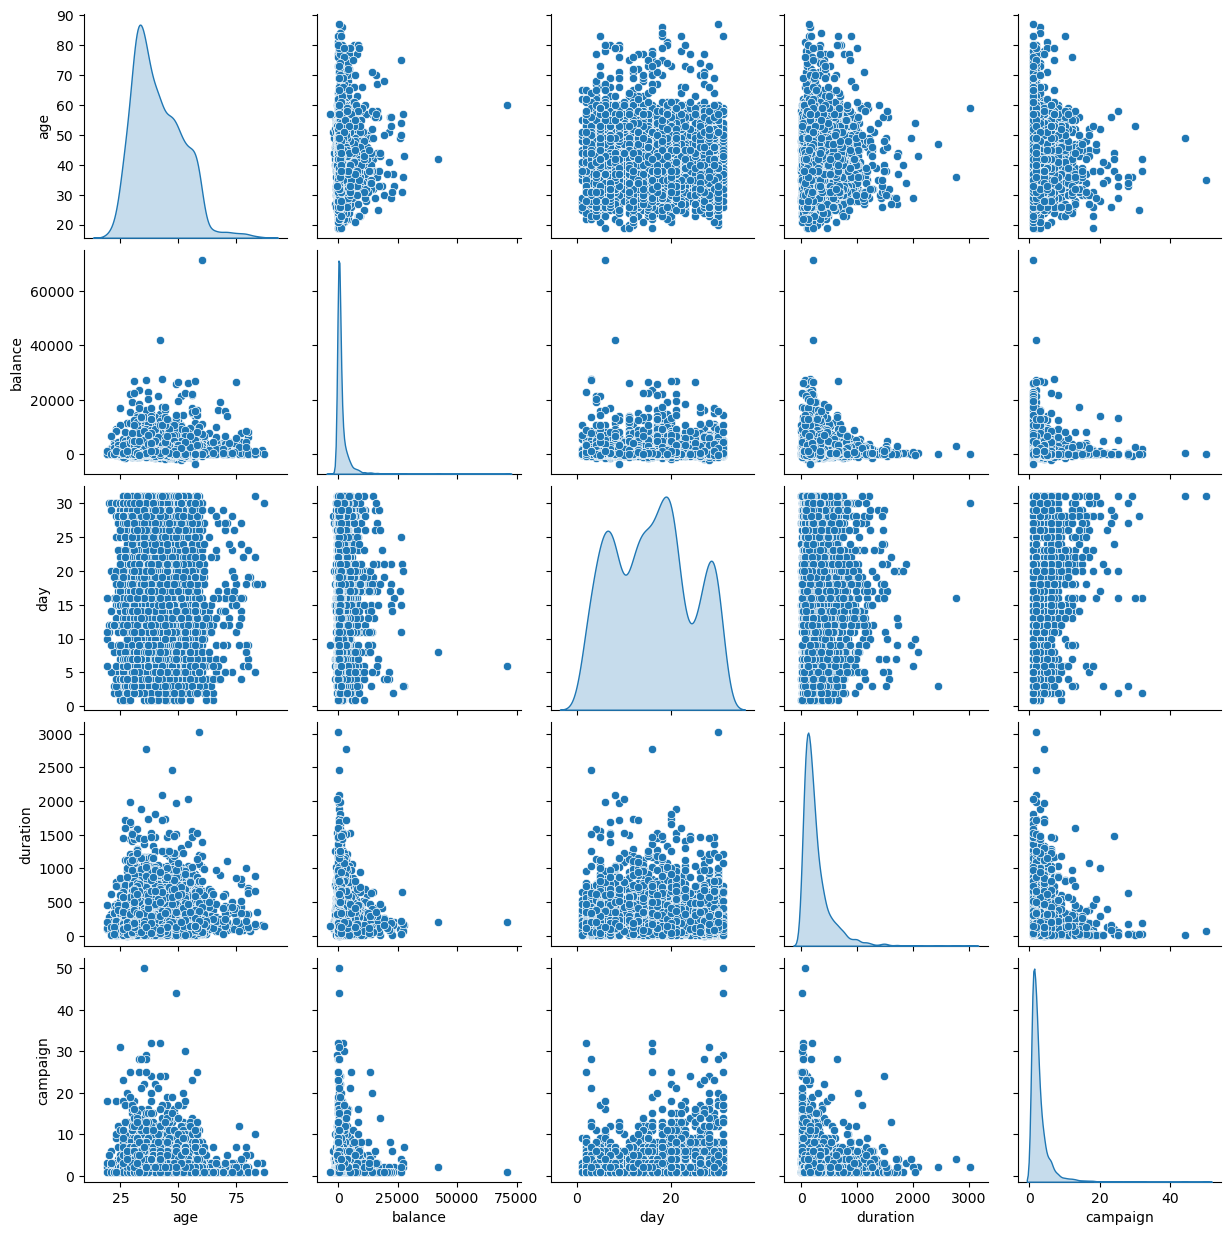

In [23]:
sns.pairplot(df[['age', 'balance', 'day', 'duration', 'campaign']], diag_kind='kde')
plt.show()

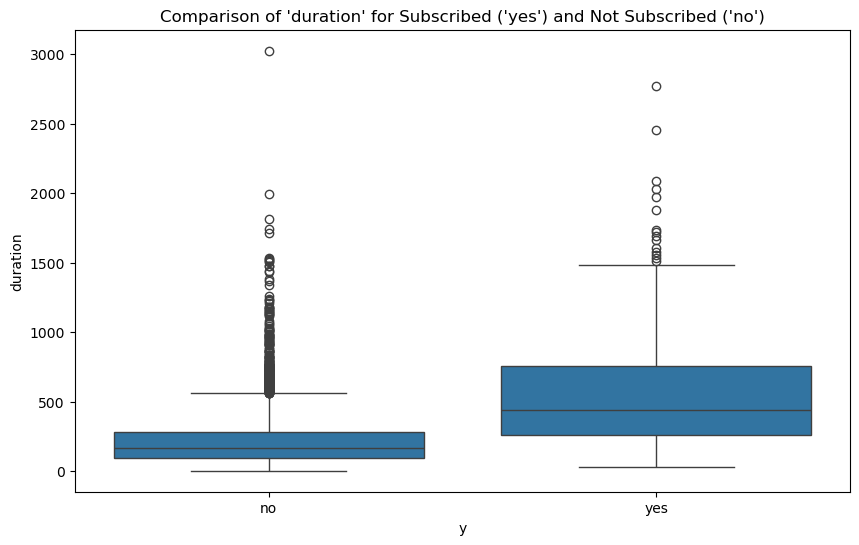

In [24]:
# Compare 'duration' for subscribed ('yes') and not subscribed ('no')
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='duration', data=df)
plt.title("Comparison of 'duration' for Subscribed ('yes') and Not Subscribed ('no')")
plt.show()

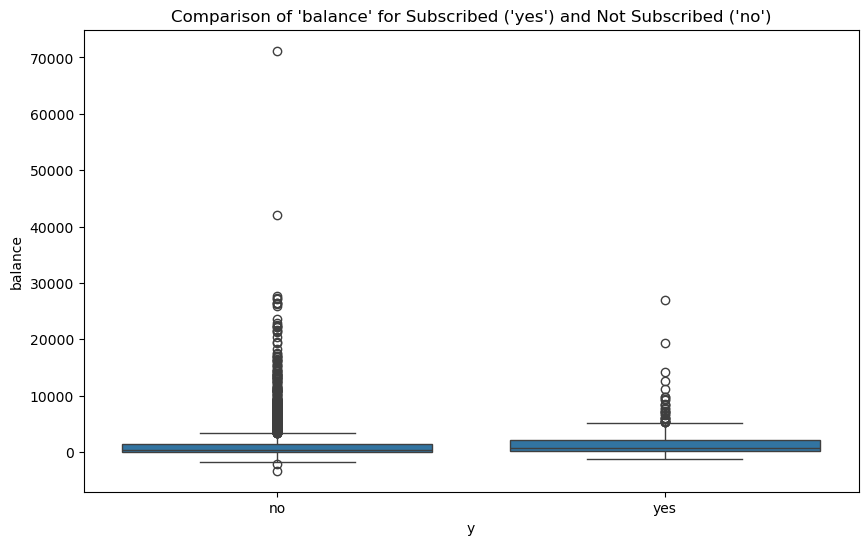

In [25]:
# Compare 'balance' for subscribed ('yes') and not subscribed ('no')
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='balance', data=df)
plt.title("Comparison of 'balance' for Subscribed ('yes') and Not Subscribed ('no')")
plt.show()

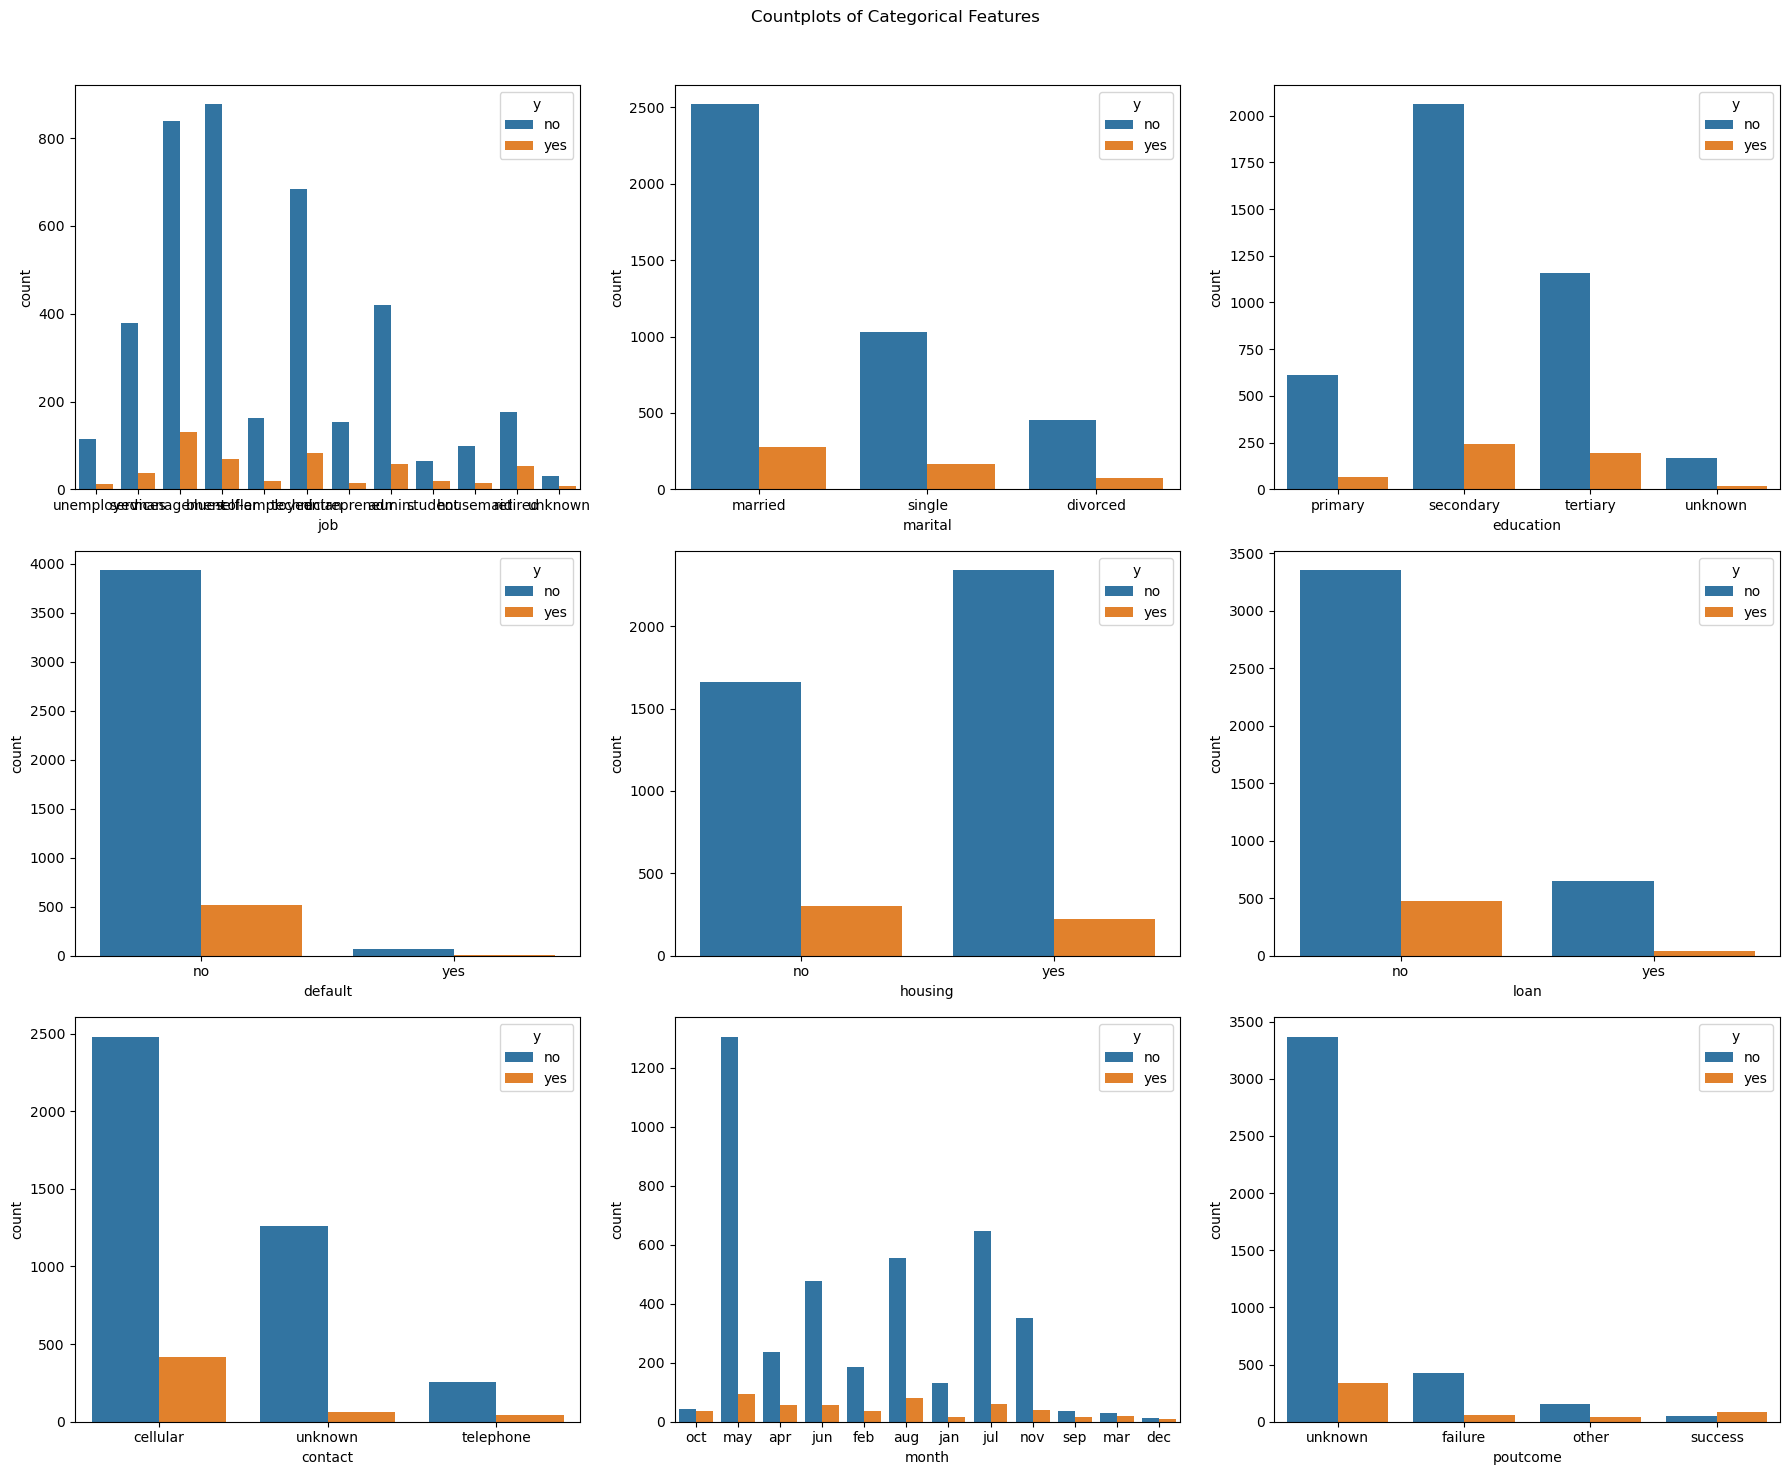

In [26]:
# Countplot for categorical features
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle("Countplots of Categorical Features")

categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for i, feature in enumerate(categorical_features):
    row, col = i // 3, i % 3
    sns.countplot(x=feature, hue='y', data=df, ax=axes[row, col])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

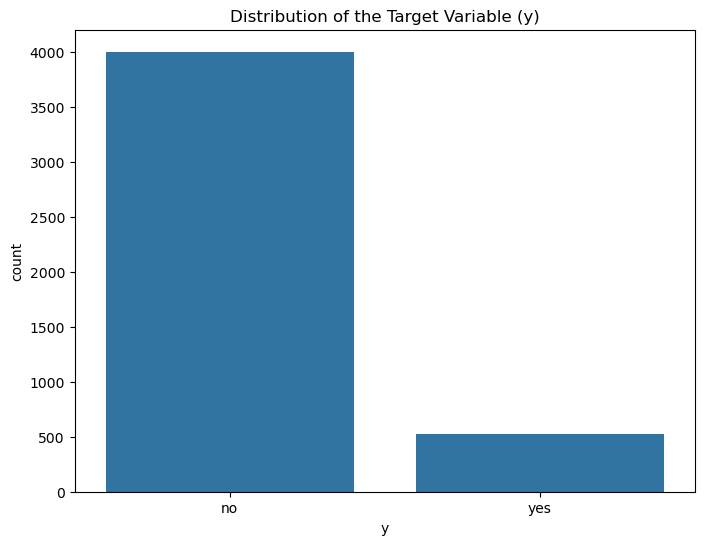

In [27]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=df)
plt.title('Distribution of the Target Variable (y)')
plt.show()

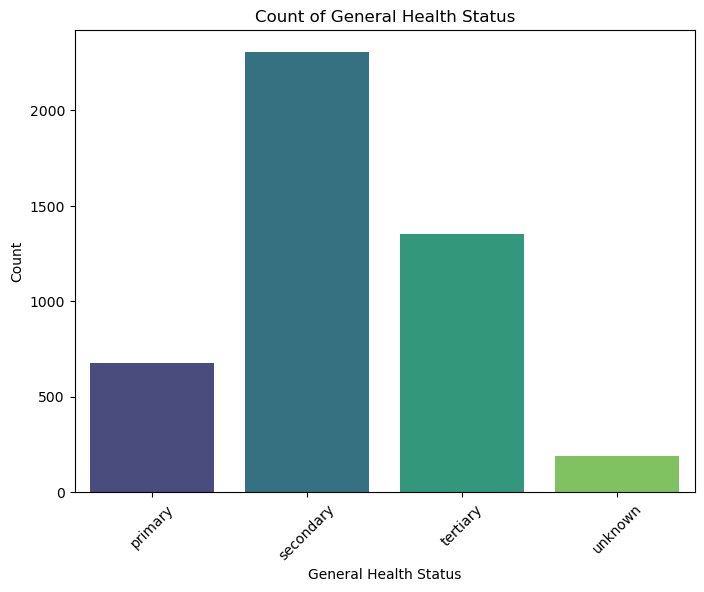

In [28]:
# Count plot for Education
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='education', palette='viridis')
plt.title('Count of General Health Status')
plt.xlabel('General Health Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


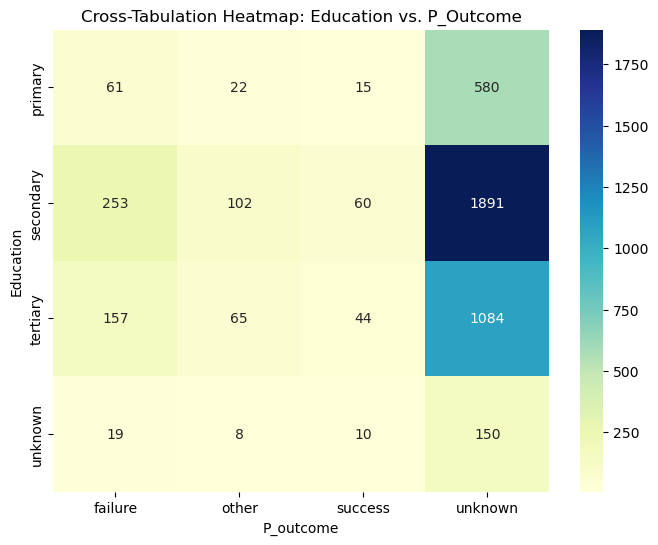

In [29]:
crosstab = pd.crosstab(df['education'], df['poutcome'])
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Cross-Tabulation Heatmap: Education vs. P_Outcome')
plt.xlabel('P_outcome')
plt.ylabel('Education')
plt.show()

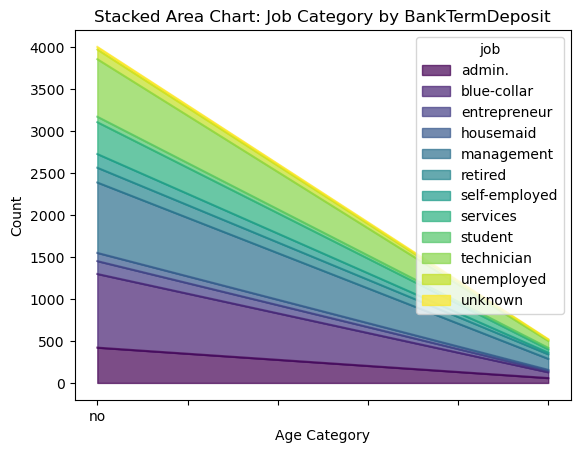

In [30]:
# Stacked Area Chart: Job Category by BankTermDeposit
crosstab = pd.crosstab(df['y'], df['job'])
crosstab.plot(kind='area', colormap='viridis', alpha=0.7, stacked=True)
plt.title('Stacked Area Chart: Job Category by BankTermDeposit')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()

In [31]:
# Selecting only numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Function to count outliers
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

# Count outliers for each numerical column
outlier_counts = {col: count_outliers(df[col]) for col in num_cols}

# Display results
outlier_df = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier_Count'])
print(outlier_df)


     Column  Outlier_Count
0       age             38
1   balance            506
2       day              0
3  duration            330
4  campaign            318
5     pdays            816
6  previous            816


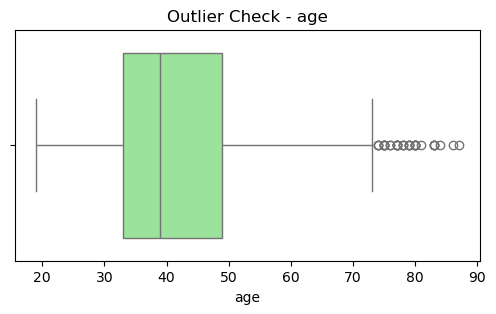

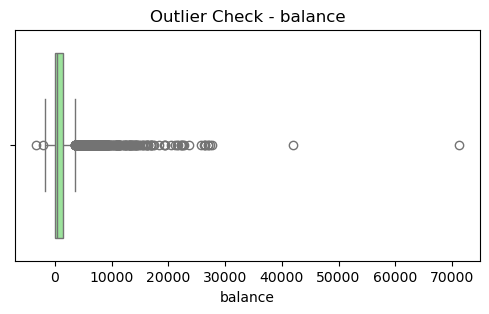

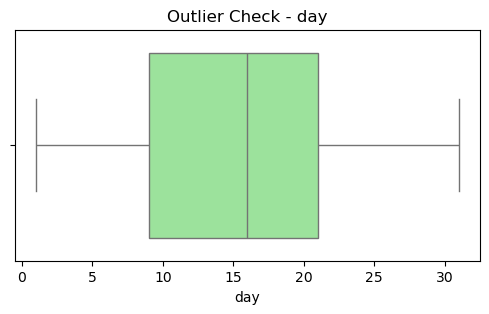

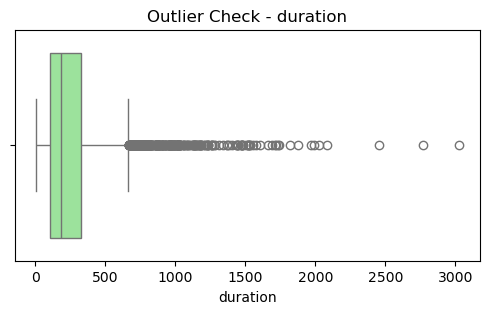

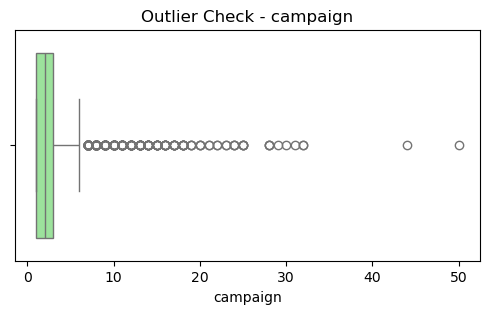

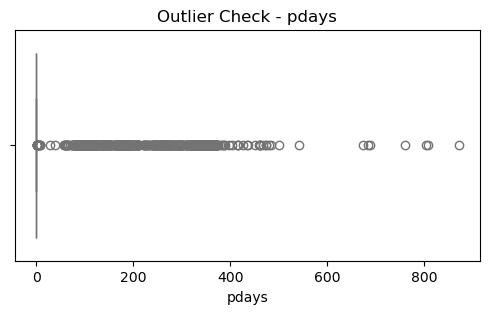

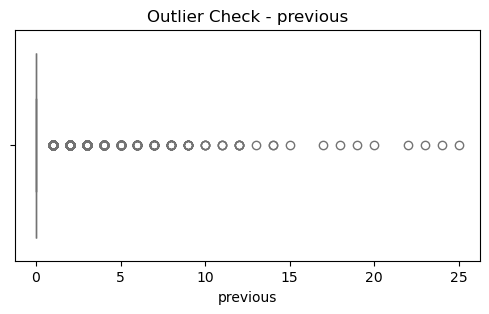

In [32]:
#  Outlier detection (boxplots for numerical)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Outlier Check - {col}')
    plt.show()

In [33]:
target_col = "y" 
X = df.drop(columns=[target_col])
y = df[target_col]


In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [35]:
#-----------------------------
# REMOVE OUTLIER WITH IQR
#-----------------------------
# Select only numeric columns from your dataset
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()
selected_columns = ['balance', 'duration', 'campaign', 'pdays', 'previous']
selected_columns = [col for col in selected_columns if col in numeric_cols]

# Calculate the IQR for selected numeric columns
Q1 = X_train[selected_columns].quantile(0.25)
Q3 = X_train[selected_columns].quantile(0.75)
IQR = Q3 - Q1

# Outlier threshold
threshold = 1.5

# Create mask for rows with any outliers
outlier_mask = (
    (X_train[selected_columns] < (Q1 - threshold * IQR)) |
    (X_train[selected_columns] > (Q3 + threshold * IQR))
).any(axis=1)

# Remove outliers
X_train_clean = X_train[~outlier_mask]
y_train_clean = y_train[~outlier_mask]

# Number of rows removed
num_rows_removed = len(X_train) - len(X_train_clean)
print(f"Number of rows removed due to outliers: {num_rows_removed}")


Number of rows removed due to outliers: 1374


## ♻ Data Preprocessing :
* Handle missing data:
    * Numerical → mean/median or model-based imputation
    * Categorical → mode or special category (“Unknown”)
* Encode categorical features:
    * One-hot encoding (low cardinality)
    * Target/Ordinal encoding (high cardinality)
* Feature scaling:
    * StandardScaler (SVM, Logistic Regression, KNN)
    * Sometimes skip scaling for tree-based models
* Feature engineering:
    * Ratios, interactions, domain-specific transformations.
* Class imbalance handling:
    * Oversampling (SMOTE)
    * Undersampling
    * Class-weight adjustment

In [37]:
# -------------------------
#  Separate Features & Target
# -------------------------
# Assume target column is 'y'
X = df.drop('y', axis=1)
y = df['y']


In [38]:
# -------------------------
#  Identify Column Types
# -------------------------
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

print("\nNumerical columns:", num_cols.tolist())
print("Categorical columns:", cat_cols.tolist())



Numerical columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [39]:
# --------------------------------------
# Handle Missing Data & Encoding
# ---------------------------------------
# Numerical pipeline → impute with median + scale
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline → impute with 'Unknown' + one-hot encode
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

In [40]:
# Create a copy of the DataFrame to avoid modifying the original
df_encoded = df.copy()

# Create a label encoder object
label_encoder = LabelEncoder()

# Iterate through each object column and encode its values
for column in df_encoded.select_dtypes(include='object'):
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# df_encoded contains the label-encoded categorical columns
df_encoded.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [41]:
# Checking the number of unique values
df_encoded.select_dtypes(include='int64').nunique()

age           67
balance     2353
day           31
duration     875
campaign      32
pdays        292
previous      24
dtype: int64

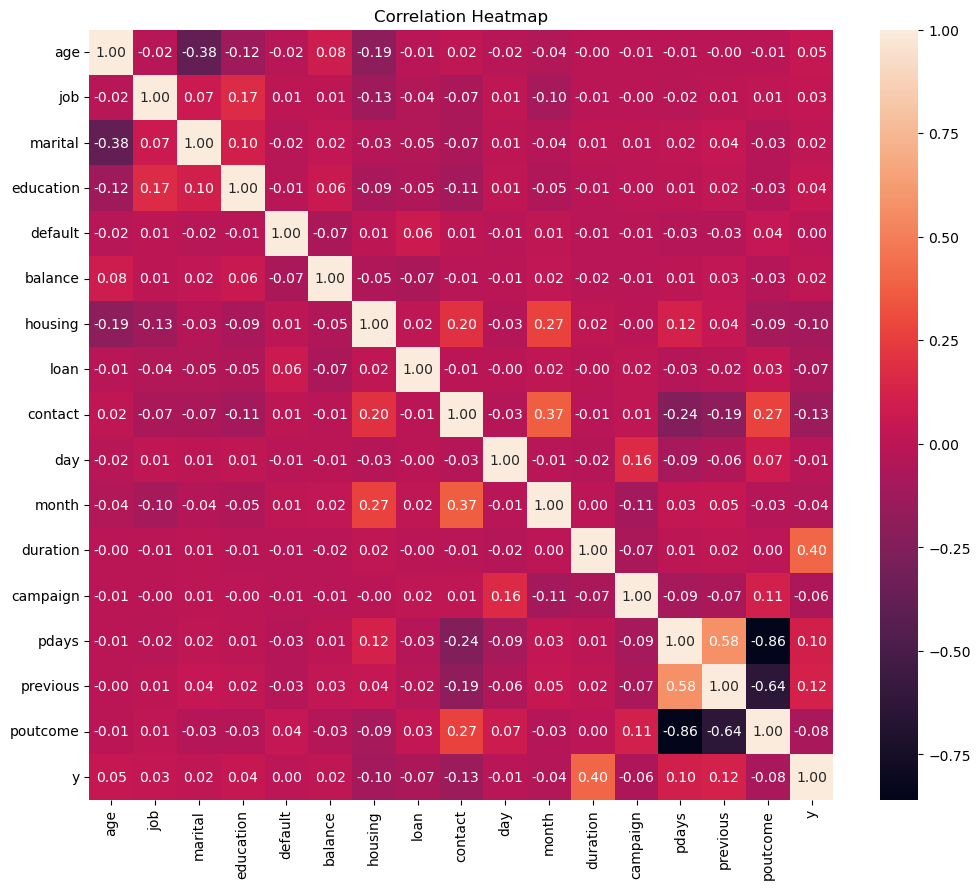

In [42]:
# Calculate the correlation matrix for Data
correlation_matrix = df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [43]:
print(correlation_matrix)

                age       job   marital  education   default   balance  \
age        1.000000 -0.021500 -0.381485  -0.121613 -0.017885  0.083820   
job       -0.021500  1.000000  0.069390   0.170160  0.008324  0.009797   
marital   -0.381485  0.069390  1.000000   0.102714 -0.020745  0.024971   
education -0.121613  0.170160  0.102714   1.000000 -0.010534  0.057725   
default   -0.017885  0.008324 -0.020745  -0.010534  1.000000 -0.070886   
balance    0.083820  0.009797  0.024971   0.057725 -0.070886  1.000000   
housing   -0.193888 -0.128353 -0.029851  -0.087070  0.006881 -0.050227   
loan      -0.011250 -0.040245 -0.045210  -0.054086  0.063994 -0.071349   
contact    0.015161 -0.074068 -0.068236  -0.110554  0.008448 -0.009665   
day       -0.017853  0.012865  0.008794   0.014926 -0.013261 -0.008677   
month     -0.040714 -0.096613 -0.035855  -0.050086  0.014297  0.023113   
duration  -0.002367 -0.006739  0.006619  -0.014878 -0.011615 -0.015950   
campaign  -0.005148 -0.002739  0.00591

In [44]:
# Set the correlation threshold for feature removal
correlation_threshold = 0.05

# Filter columns with correlation below the threshold with 'y'
low_corr_features = df_encoded.columns[abs(df_encoded.corr()['y']) < correlation_threshold]

# Display the features to be removed
print("Features to be removed:", low_corr_features)

# Drop the low-correlation features
df_train_filtered = df_encoded.drop(low_corr_features, axis=1)

# Display the updated dataframe
print("\nDataFrame after feature removal:")
print(df_train_filtered.head())


Features to be removed: Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'day',
       'month'],
      dtype='object')

DataFrame after feature removal:
   housing  loan  contact  duration  campaign  pdays  previous  poutcome  y
0        0     0        0        79         1     -1         0         3  0
1        1     1        0       220         1    339         4         0  0
2        1     0        0       185         1    330         1         0  0
3        1     1        2       199         4     -1         0         3  0
4        1     0        2       226         1     -1         0         3  0


In [45]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [46]:
# Apply preprocessing to X
X_preprocessed = preprocessor.fit_transform(X)

# Handle class imbalance with SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_preprocessed, y)


In [47]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42
)

In [48]:
# Train model (RandomForest works well here)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
# Predictions
y_pred = model.predict(X_test)

In [50]:

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[767  34]
 [ 31 768]]

Classification Report:
               precision    recall  f1-score   support

          no       0.96      0.96      0.96       801
         yes       0.96      0.96      0.96       799

    accuracy                           0.96      1600
   macro avg       0.96      0.96      0.96      1600
weighted avg       0.96      0.96      0.96      1600



## 🧪 Train/Test Split :
  * Hold-out method: 70–80% train, 20–30% test.
  * Cross-validation for better generalization measurement.
  * Stratification for balanced class distribution.


In [52]:
# Train/Test split (Hold-out method)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # 80% train, 20% test
    stratify=y,     # keeps class distribution balanced
    random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (3616, 16)
Test shape: (905, 16)


In [53]:
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(exclude=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []

for train_index, test_index in skf.split(X, y):
    X_train_raw, X_test_raw = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit preprocessor only on training data, then transform both train and test
    X_train_processed = preprocessor.fit_transform(X_train_raw)
    X_test_processed = preprocessor.transform(X_test_raw)

    # Apply SMOTE only on training data
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train_processed, y_train)

    # Train model
    model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
    model.fit(X_train_res, y_train_res)

    # Predict on test set
    y_pred = model.predict(X_test_processed)

    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

print("Cross-validation accuracies:", accuracies)
print("Mean CV accuracy:", np.mean(accuracies))


Cross-validation accuracies: [0.901657458563536, 0.8827433628318584, 0.9081858407079646, 0.9059734513274337, 0.8882743362831859]
Mean CV accuracy: 0.8973668899427958


In [54]:
# Manually Encode Before CV
encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)
scores = cross_val_score(RandomForestClassifier(), X_encoded, y, cv=5)
print("Mean CV Score:", scores.mean())


Mean CV Score: 0.8882982936488535


## 👉 Model Selection :
* Try a model stack for benchmarking:
   * Baseline: Logistic Regression (interpretable, fast)
   * Tree-based: Random Forest, Gradient Boosting (XGBoost, LightGBM, CatBoost)
   * Distance-based: KNN
   * Kernel-based: SVM
   * Neural networks: If large & complex dataset

In [56]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols)
    ]
)

In [57]:
# different Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced"),
    "Balanced Random Forest": BalancedRandomForestClassifier(n_estimators=200, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight="balanced"),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel="rbf", probability=True, class_weight="balanced"),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42),
    "CatBoost": cb.CatBoostClassifier(verbose=0, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42),
    "Voting Classifier": VotingClassifier(
        estimators=[
            ("rf", RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")),
            ("xgb", xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)),
            ("lgb", lgb.LGBMClassifier(random_state=42))
        ],
        voting="soft"
    )
}

In [58]:
from imblearn.pipeline import Pipeline   # ← NOT sklearn.pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # 'no' → 0, 'yes' → 1

# Cross-validation setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {}
for name, clf in models.items():
    pipe = Pipeline([
        ("preprocessor", preprocessor),    # handles encoding & scaling
        ("smote", SMOTE(random_state=42)), # resample inside CV
        ("classifier", clf)
    ])
    
    scores = cross_val_score(pipe, X, y_encoded, cv=skf, scoring="accuracy")
    results[name] = scores.mean()

print(results)


[LightGBM] [Info] Number of positive: 3200, number of negative: 3200
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8397
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 3200, number of negative: 3200
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8196
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [59]:
# Show results
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Mean Accuracy"])
results_df = results_df.sort_values(by="Mean Accuracy", ascending=False)

print(results_df)

                     Model  Mean Accuracy
7                 LightGBM       0.898916
8                 CatBoost       0.898032
10       Gradient Boosting       0.897368
11       Voting Classifier       0.897147
2   Balanced Random Forest       0.893608
6                  XGBoost       0.892504
1            Random Forest       0.892279
9                 AdaBoost       0.889848
3            Decision Tree       0.862199
5                      SVM       0.855122
0      Logistic Regression       0.836543
4                      KNN       0.810221


## 🛰 Model Evaluation :
* Use multiple metrics, not just accuracy:
    * Accuracy (overall correctness)
    * Precision (purity of positive predictions)
    * Recall (coverage of positives)
    * F1-score (balance between precision & recall)
    * ROC-AUC (ranking performance)
* Confusion matrix for error analysis.

In [61]:
target = 'y' 

In [62]:
print(f"Dataset shape: {df.shape}")
print(f"Target distribution:\n{df[target].value_counts(normalize=True)}\n")

Dataset shape: (4521, 17)
Target distribution:
y
no     0.88476
yes    0.11524
Name: proportion, dtype: float64



In [63]:
# Encode categorical features 
cat_cols = df.select_dtypes(include='object').columns.tolist()
print(f"Categorical columns detected: {cat_cols}")
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

Categorical columns detected: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [64]:
X = df.drop(columns=[target])
y = df[target]


In [65]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [66]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [67]:
pip install catboost lightgbm xgboost


Note: you may need to restart the kernel to use updated packages.


In [68]:
from catboost import CatBoostClassifier

In [69]:
# Models
models = {
    'CatBoost': CatBoostClassifier(random_seed=42, silent=True),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True, random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = {}

---- Model Evaluation Report ----

Model: CatBoost
Accuracy: 0.9017
Precision: 0.5738
Recall: 0.3571
F1-score: 0.4403
ROC-AUC: 0.9233
Confusion Matrix:
[[781  26]
 [ 63  35]]

Model: Logistic Regression
Accuracy: 0.8939
Precision: 0.5294
Recall: 0.1837
F1-score: 0.2727
ROC-AUC: 0.8644
Confusion Matrix:
[[791  16]
 [ 80  18]]

Model: Decision Tree
Accuracy: 0.8729
Precision: 0.4220
Recall: 0.4694
F1-score: 0.4444
ROC-AUC: 0.6957
Confusion Matrix:
[[744  63]
 [ 52  46]]

Model: Random Forest
Accuracy: 0.9028
Precision: 0.6087
Recall: 0.2857
F1-score: 0.3889
ROC-AUC: 0.9120
Confusion Matrix:
[[789  18]
 [ 70  28]]

Model: Gradient Boosting
Accuracy: 0.8928
Precision: 0.5094
Recall: 0.2755
F1-score: 0.3576
ROC-AUC: 0.9019
Confusion Matrix:
[[781  26]
 [ 71  27]]

Model: AdaBoost
Accuracy: 0.8994
Precision: 0.5538
Recall: 0.3673
F1-score: 0.4417
ROC-AUC: 0.8905
Confusion Matrix:
[[778  29]
 [ 62  36]]

Model: KNN
Accuracy: 0.8917
Precision: 0.5000
Recall: 0.2041
F1-score: 0.2899
ROC-AUC: 0.

<Figure size 1400x900 with 0 Axes>

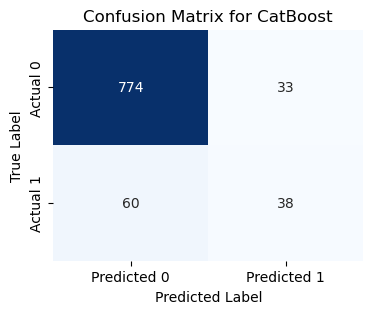

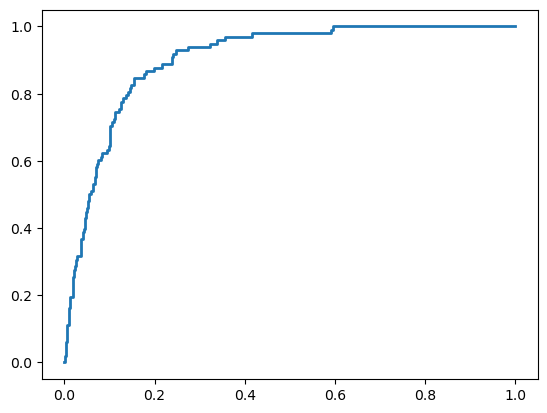

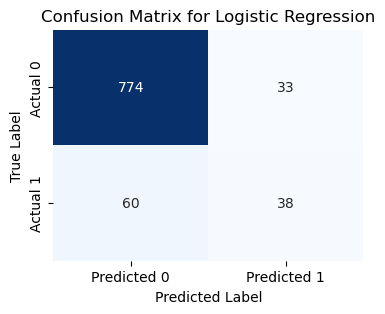

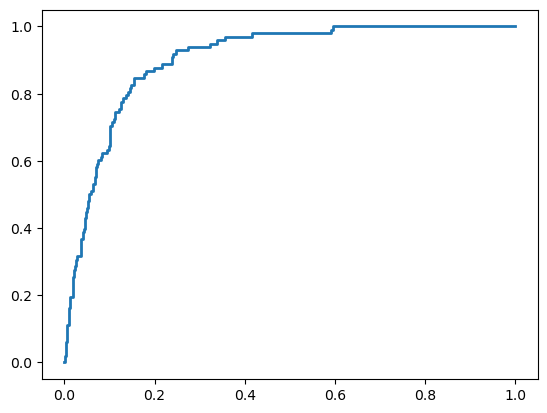

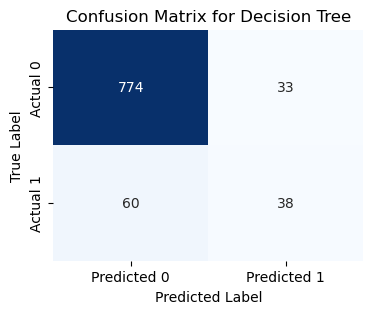

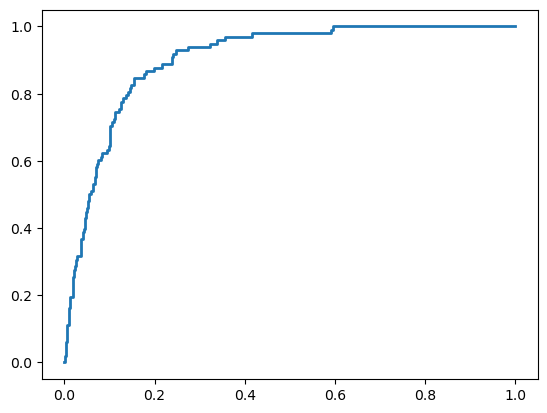

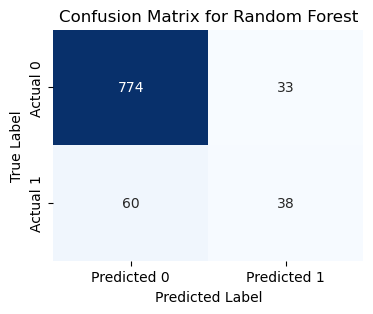

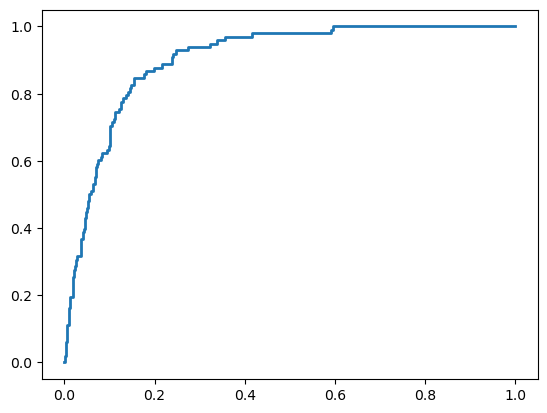

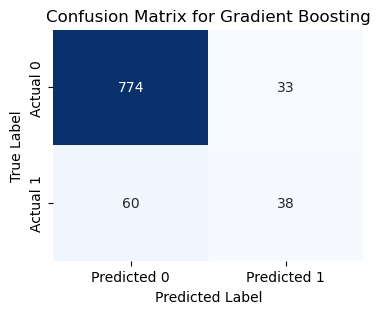

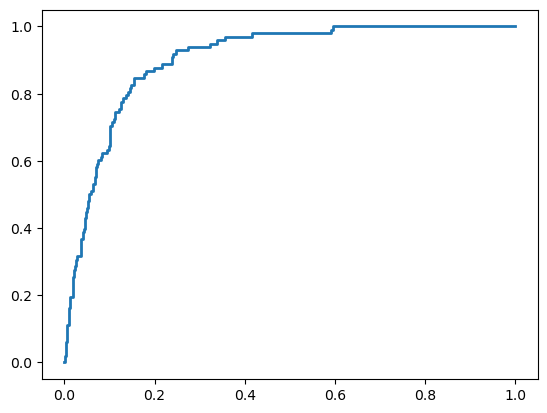

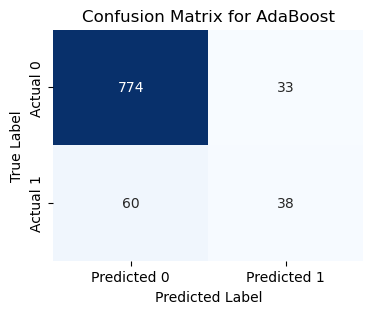

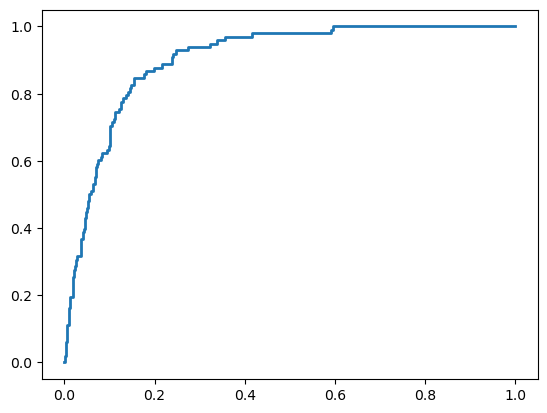

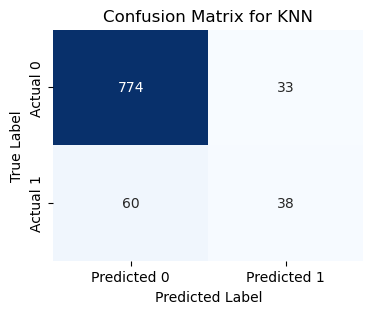

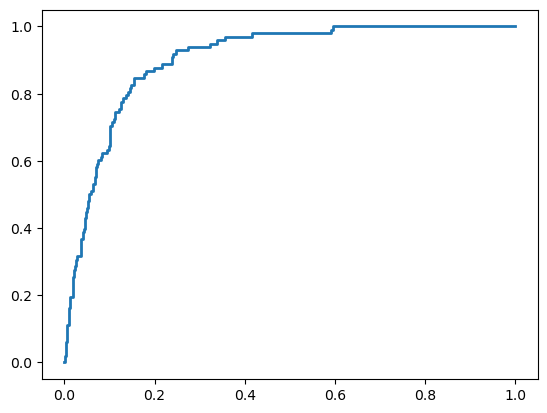

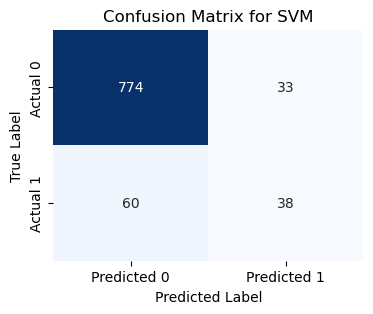

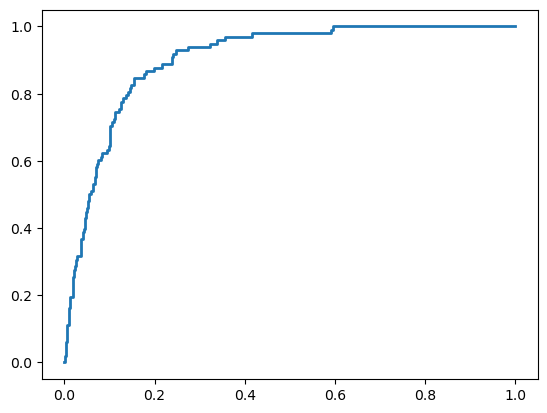

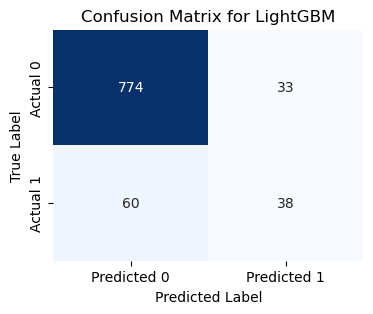

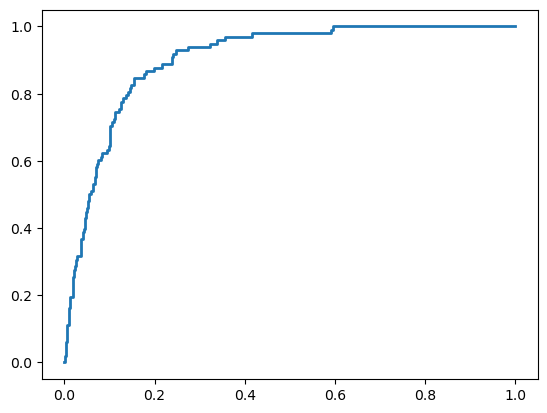

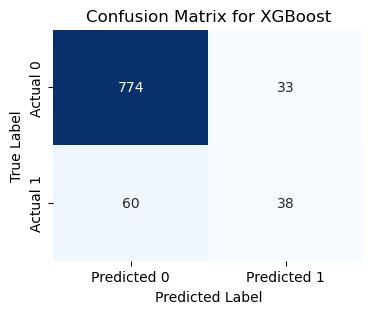

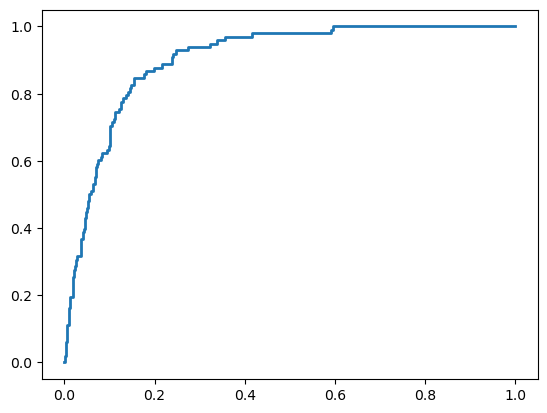

In [70]:
# Create figure for ROC curves outside the loop
plt.figure(figsize=(14, 9))

print("---- Model Evaluation Report ----")

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-score': f1,
        'ROC-AUC': roc_auc,
        'Confusion Matrix': cm
    }

    print(f"\nModel: {name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"Confusion Matrix:\n{cm}")

for name, model in models.items():
    # ... your code ...

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC={roc_auc:.3f})')


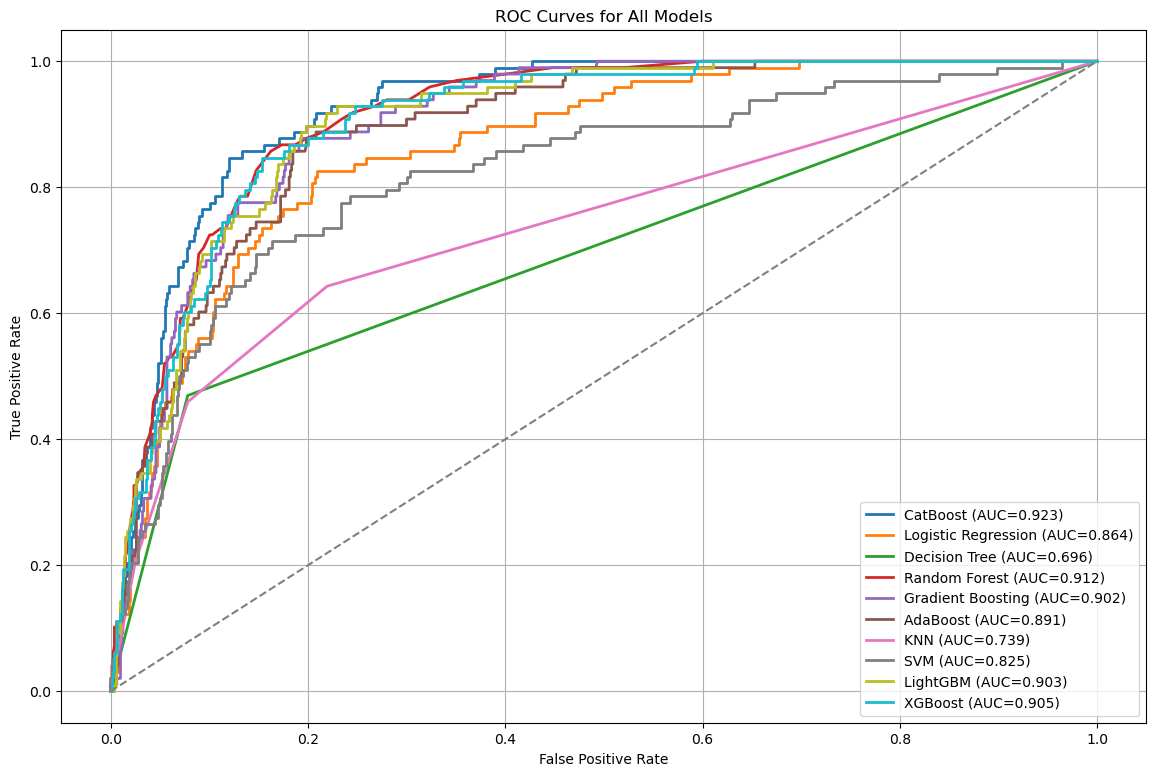

In [71]:
plt.figure(figsize=(14, 9))  

for name, model in models.items():
    # Assuming model is already trained and you have X_test, y_test
    y_proba = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)

    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC={roc_auc:.3f})')

# Plot diagonal line for random guess
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [72]:
# Summary table without confusion matrix for clarity
summary_df = pd.DataFrame.from_dict(results, orient='index').drop(columns=['Confusion Matrix'])
print("\nSummary Table:")
print(summary_df.round(4))


Summary Table:
                     Accuracy  Precision  Recall  F1-score  ROC-AUC
CatBoost               0.9017     0.5738  0.3571    0.4403   0.9233
Logistic Regression    0.8939     0.5294  0.1837    0.2727   0.8644
Decision Tree          0.8729     0.4220  0.4694    0.4444   0.6957
Random Forest          0.9028     0.6087  0.2857    0.3889   0.9120
Gradient Boosting      0.8928     0.5094  0.2755    0.3576   0.9019
AdaBoost               0.8994     0.5538  0.3673    0.4417   0.8905
KNN                    0.8917     0.5000  0.2041    0.2899   0.7393
SVM                    0.8961     0.5556  0.2041    0.2985   0.8245
LightGBM               0.8950     0.5211  0.3776    0.4379   0.9035
XGBoost                0.8972     0.5352  0.3878    0.4497   0.9052


## 🛠. Model Tuning
* Hyperparameter optimization:
   * GridSearchCV / RandomizedSearchCV
   * Bayesian Optimization
* Early stopping for boosting models
* Regularization to avoid overfitting

In [74]:
pip install scikit-optimize


Note: you may need to restart the kernel to use updated packages.


In [75]:
# Encode categorical features (LabelEncoder works fine for non-ordinal encoding here)
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))


In [76]:
# ---- CatBoost ----
cat_model = CatBoostClassifier(random_seed=42, silent=True)

cat_param_grid = {
    'iterations': [100, 200],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1],
    'l2_leaf_reg': [1, 3, 5]
}

cat_grid = GridSearchCV(cat_model, cat_param_grid, cv=3, n_jobs=1)
cat_grid.fit(X_train, y_train)

print("CatBoost Best params:", cat_grid.best_params_)
print("CatBoost Best CV score:", cat_grid.best_score_)


CatBoost Best params: {'depth': 4, 'iterations': 200, 'l2_leaf_reg': 5, 'learning_rate': 0.1}
CatBoost Best CV score: 0.8971227312033654


In [77]:
# ---- XGBoost ----
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1]
}

xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=3, n_jobs=1)
xgb_grid.fit(X_train, y_train)

print("XGBoost Best params:", xgb_grid.best_params_)
print("XGBoost Best CV score:", xgb_grid.best_score_)

XGBoost Best params: {'colsample_bytree': 1, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.7}
XGBoost Best CV score: 0.8954638976624484


In [78]:
# ---- Compare ----
if cat_grid.best_score_ > xgb_grid.best_score_:
    print("Best model: CatBoost")
    best_model = cat_grid.best_estimator_
else:
    print("Best model: XGBoost")
    best_model = xgb_grid.best_estimator_

# Evaluate on test set
test_score = best_model.score(X_test, y_test)
print("Test accuracy of best model:", test_score)




Best model: CatBoost
Test accuracy of best model: 0.8917127071823204


### 🔍 CatBoost Classifier seems to be the best-performing model among the ones we have tested.
* Among the models we have evaluated, CatBoost stands out as a strong performer. It has an AUC score of 0.9176, which is among the highest, and it also demonstrates good accuracy (0.8917). CatBoost is known for its high performance, flexibility, and ability to handle complex relationships in the data. Additionally, it often requires less tuning compared to other ensemble methods.
* Therefore, looking for a single model that outperforms others in terms of AUC and accuracy, CatBoost would be a strong choice based on this dataset.
* The model's ability to correctly classify instances from both classes, along with its robust performance metrics, makes it a suitable choice for the given classification task. The hyperparameters chosen through grid search seem well-tuned for the dataset, contributing to the model's overall effectiveness. Additionally, the model's performance is notably better than other algorithms.


## 🗂 FINAL EVALUATION :

In [81]:
# Separate features (X) and target (y)
X_train = df.drop("y", axis=1)  # Replace 'deposit' with your target column
y_train = df["y"]
# Get column names
feature_names = X_train.columns.tolist()
#  Define column groups
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols =X.select_dtypes(include=['int64', 'float64']).columns
# Preprocessing
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ("num", "passthrough", numeric_cols)
])

#  Pipeline with CatBoost
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", CatBoostClassifier(random_seed=42, silent=True))
])
# Train
pipeline.fit(X_train, y_train)
#  Save the pipeline (model + preprocessing)
joblib.dump(pipeline, "best_model.pkl")
print("✅ Model pipeline saved as best_model.pkl")


✅ Model pipeline saved as best_model.pkl


In [82]:
# -------------------------------
# 1. Load the saved pipeline
# -------------------------------
pipeline = joblib.load("best_model.pkl")
# -------------------------------
# 2. Load new data
# -------------------------------
new_data = pd.read_csv("bank_deposit.csv")  
# -------------------------------
# 3. Predict
# -------------------------------
predictions = pipeline.predict(new_data)
# If you also want probabilities for 'yes'/'no'
probabilities = pipeline.predict_proba(new_data)[:, 1]  
# -------------------------------
# 4. Add predictions to DataFrame
# -------------------------------
new_data["predicted_target"] = predictions        
new_data["deposit_probability"] = probabilities
# -------------------------------
# 5. Save results
# -------------------------------
new_data.to_csv("predicted_results.csv", index=False)
print("✅ Predictions saved to predicted_results.csv")


✅ Predictions saved to predicted_results.csv


## 🤖 PREDICT ON NEW DATA      

CatBoost Accuracy: 0.8917
CatBoost Precision: 0.5000
CatBoost Recall: 0.3163
CatBoost F1 Score: 0.3875


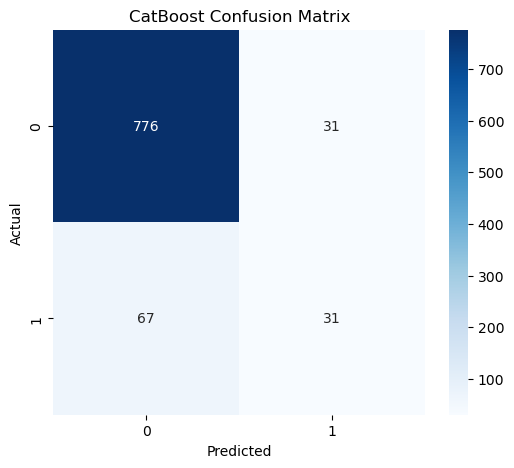

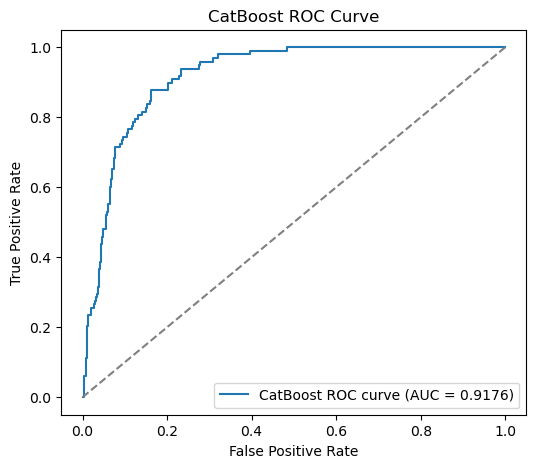

In [84]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
)

model_name = "CatBoost"

# Predict on test data
y_pred = best_model.predict(X_test)

# For ROC curve, need predicted probabilities for positive class
if hasattr(best_model, "predict_proba"):
    y_proba = best_model.predict_proba(X_test)[:, 1]
else:
    # If model does not have predict_proba, try decision_function
    y_proba = best_model.decision_function(X_test)

# Calculate metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='binary')  # Change average for multiclass if needed
rec = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"{model_name} Accuracy: {acc:.4f}")
print(f"{model_name} Precision: {prec:.4f}")
print(f"{model_name} Recall: {rec:.4f}")
print(f"{model_name} F1 Score: {f1:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"{model_name} Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"{model_name} ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"{model_name} ROC Curve")
plt.legend()
plt.show()


## 🚀 PERFORMANCE SUMMARY :
* This notebook aimed to predict term deposit subscription for bank clients.
* Key steps:
   * Data Exploration: Explored client information and target distribution.
   * Data Preprocessing: Selected features, encoded categorical data.
   * Model Selection: Explored various models, selected CatBoost for its high AUC score.
   * Hyperparameter Tuning: Fine-tuned CatBoost using GridSearchCV.
   * Test Dataset Prediction: Applied the trained CatBoost model on the test dataset.
   * Results and Accuracy: Achieved a model accuracy of approximately 89.17%.
   * In conclusion, the notebook demonstrated a structured approach from data exploration to model selection, culminating in a successful predictive    model for term deposit subscription.